In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

def diff_eqs(INP,t):  
    Y=np.zeros((5))
    V = INP
    beta=1.4247/(V[0] + V[1] + V[2] + V[3])
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = (1-alpha) * gamma * V[1]
    Y[3] = (alpha) * gamma * V[1]
    Y[4] = beta * V[0] * V[1]
    return Y   # For odeint

gamma=0.14286
alpha=0.015
TS=1.0
ND=70.0
S0=1000-1
I0=1
INPUT = (S0, I0, 0.0, 0.0, 0)

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

In [2]:
total_cases = []
for t in range(1, len(t_range), 1):
    total_cases.append(((RES[t, 4]) - (RES[t-1, 4])))

Text(0, 0.5, 'Number of individuals')

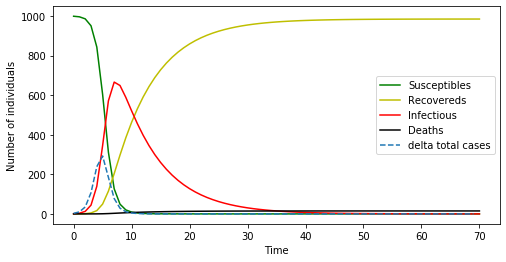

In [3]:
fig, ax = pl.subplots(figsize=(8,4))

pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.plot(RES[:,2], '-y', label='Recovereds')
pl.plot(RES[:,1], '-r', label='Infectious')
pl.plot(RES[:,3], '-k', label='Deaths')
pl.plot(total_cases, '--', label='delta total cases')
pl.legend(loc=0)

pl.xlabel('Time')
pl.ylabel('Number of individuals')

# Multiple provinces

In [4]:
def province(diff, t_start, t_end, t_inc, INPUT, ep_start):
    before = np.tile(INPUT,(ep_start,1))
    t_range_ = np.arange(t_start, t_end+t_inc-ep_start, t_inc)
    return np.concatenate((before, spi.odeint(diff,INPUT,t_range_)))

In [5]:
## We consider a toy region made by 4 provinces ##
beta=1.4247/1000
gamma=0.14286
alpha=0.09
TS=1.0
ND=100
t_range = np.arange(TS, ND, 1)
# Province 1 #
I0=1
S0=1000000-I0
INPUT = (S0, I0, 0.0, 0.0, 0)
RES1 = province(diff_eqs, TS, ND, 1.0, INPUT, 0)
# Province 2 #
I0=1
S0=500000-I0
INPUT = (S0, I0, 0.0, 0.0, 0)
RES2 = province(diff_eqs,TS, ND,1.0,INPUT, 5)
# Province 3 #
I0=1
S0=200000-I0
INPUT = (S0, I0, 0.0, 0.0, 0)
RES3 = province(diff_eqs,TS, ND, 1.0, INPUT, 10)
# Province 4 #
I0=1
S0=100000-I0
INPUT = (S0, I0, 0.0, 0.0, 0)
RES4 = province(diff_eqs, TS, ND, 1.0, INPUT, 15)

# Risk computation
The formula used to compute the risk at provincial level, following the data format given by Protezione Civile, is:

$$\frac{R^i(t)}{R^{tot}(t)/R_\text{pop}} = \frac{P^i(t)}{P^{tot}(t)/P_\text{pop}}$$

where:
* $R^i(t)$: the number of *infected* at time $t$ at regional level
* $R^{tot}(t)$: the number of *total cases* at time $t$ at regional level
* $R_\text{pop}$: the *total population* of the region
* $P^i(t)$: the number of *infected* at time $t$ at province level
* $P^{tot}(t)$: the number of *total cases* at time $t$ at province level
* $P_\text{pop}$: the *total population* of the province



In [6]:
RES = [RES1, RES2, RES3, RES4]
Reg_cases = []
Reg_infect = []
for t in range(0, len(t_range)+1, 1):
    total_reg_cases = 0
    reg_infect = 0
    for i in range(0,4):
        total_reg_cases += (RES[i][t, 4]/(RES[i][t, 0] + RES[i][t, 1] + RES[i][t, 2] + RES[i][t, 3]))
        reg_infect += RES[i][t, 1]
    Reg_cases.append(total_reg_cases)
    Reg_infect.append(reg_infect)

In [7]:
Cases = []
Infected = []
for i in range(0,4):
    total_cases_prov = []
    inf_prov = []
    for t in range(1, len(t_range), 1):
        total_cases_prov.append(((RES[i][t, 4]) - (RES[i][t-1, 4])))
        inf_prov.append((Reg_infect[t] * (RES[i][t, 4]/(RES[i][t, 0] + RES[i][t, 1] + RES[i][t, 2] + RES[i][t, 3])))/Reg_cases[t])
    Cases.append(total_cases_prov)
    Infected.append(inf_prov)

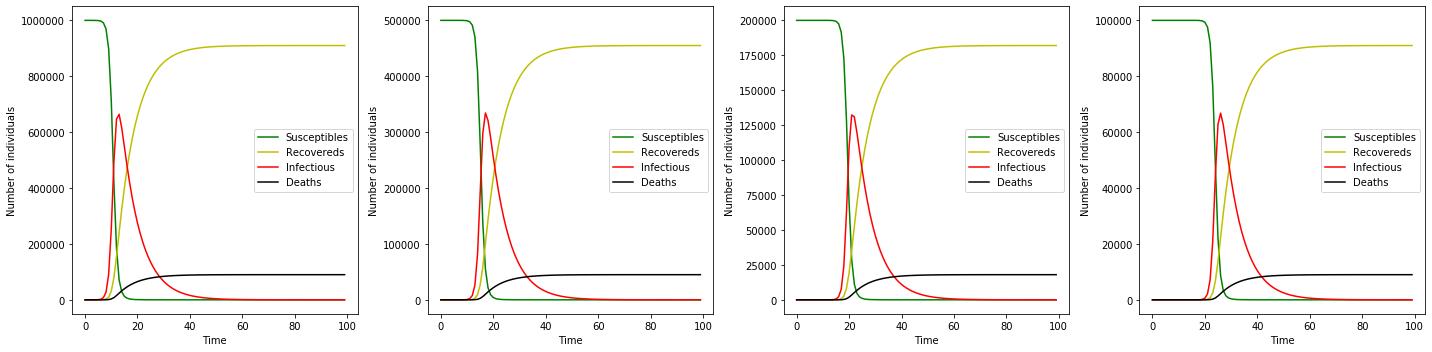

In [8]:
fig, ax = pl.subplots(nrows=1, ncols=4, figsize=(20,5))
for i in range(0,4):
    ax[i].plot(RES[i][:,0], '-g', label='Susceptibles')
    ax[i].plot(RES[i][:,2], '-y', label='Recovereds')
    ax[i].plot(RES[i][:,1], '-r', label='Infectious')
    ax[i].plot(RES[i][:,3], '-k', label='Deaths')
    #ax[i].plot(Cases[i], '--', label='delta total cases')
    #ax[i].plot(Infected[i], '--r', label='pseudo infected')

    ax[i].legend(loc=0)
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Number of individuals')
pl.tight_layout()

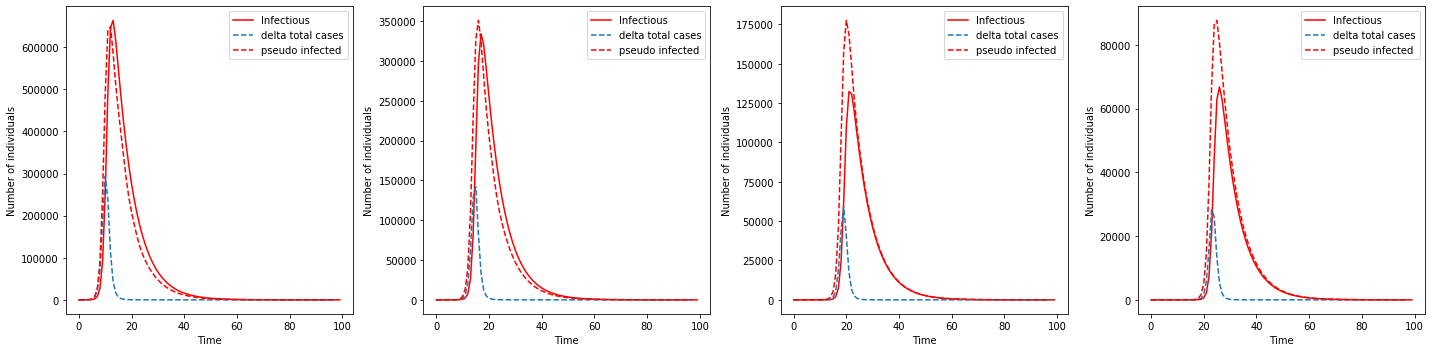

In [9]:
fig, ax = pl.subplots(nrows=1, ncols=4, figsize=(20,5))
for i in range(0,4):
    ax[i].plot(RES[i][:,1], '-r', label='Infectious')
    ax[i].plot(Cases[i], '--', label='delta total cases')
    ax[i].plot(Infected[i], '--r', label='pseudo infected')
    ax[i].legend(loc=0)
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Number of individuals')
pl.tight_layout()